# Value-at-Risk
Value at Risk - `VaR`- is one of the most important metrics that is used to measures the risk associated with a financial position or a portfolio of financial instruments. VaR can be defined as the maximum loss with a confidence level over a predetermined period. Let's say that the 1-day 95% VaR of a portfolio is  $100$. This means that 95% of the time, it is expected that - under normal market conditions - we will not lose more than $100 by holding our portfolio over one day.
Three approaches that are commonly used in the industry are
* Parametric
* Historical
* Monte Carlo

For example, a financial firm may determine an asset has a 3% one-month VaR of 2%, representing a 3% chance of the asset declining in value by 2% during the one-month time frame. The conversion of the 3% chance of occurrence to a daily ratio places the odds of a 2% loss at one day per month.

In [23]:
# Data manipulation
import pandas as pd
import numpy as np
from numpy.linalg import multi_dot

from scipy.stats import norm
from tabulate import tabulate

# Import matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt

# Plot settings
plt.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = [24.0, 8.0]
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['lines.linewidth'] = 2.0
matplotlib.rcParams['grid.color'] = 'black'

# from helper import plot_var

In [13]:
pwd

'/Users/jason/Documents/GitHub/QuantitativeFinance/4. Value at Risk GARCH'

In [18]:
# Load locally stored data
df = pd.read_csv('/Users/jason/Documents/GitHub/QuantitativeFinance/data/stocks.csv', index_col=0, parse_dates=True)

# Check values 
df

,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2015-01-02 00:00:00-05:00,24.565701,15.426000,26.168653,40.709469,49.848572
2015-01-05 00:00:00-05:00,23.873644,15.109500,25.623152,40.335110,47.311428
2015-01-06 00:00:00-05:00,23.875885,14.764500,25.029282,39.743107,46.501431
2015-01-07 00:00:00-05:00,24.210682,14.921000,24.986401,40.248039,46.742859
2015-01-08 00:00:00-05:00,25.140913,15.023000,25.065184,41.432064,47.779999
...,...,...,...,...,...
2022-12-23 00:00:00-05:00,131.658981,85.250000,89.809998,238.133545,294.959991
2022-12-27 00:00:00-05:00,129.831772,83.040001,87.930000,236.367981,284.170013
2022-12-28 00:00:00-05:00,125.847855,81.820000,86.459999,233.944031,276.880005


In [19]:
# Calculate daily returns
returns = df.pct_change().dropna()
returns.head()

,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2015-01-05 00:00:00-05:00,-0.028172,-0.020517,-0.020846,-0.009196,-0.050897
2015-01-06 00:00:00-05:00,0.000094,-0.022833,-0.023177,-0.014677,-0.017121
2015-01-07 00:00:00-05:00,0.014022,0.010600,-0.001713,0.012705,0.005192
2015-01-08 00:00:00-05:00,0.038422,0.006836,0.003153,0.029418,0.022188
2015-01-09 00:00:00-05:00,0.001073,-0.011749,-0.012951,-0.008405,-0.015458


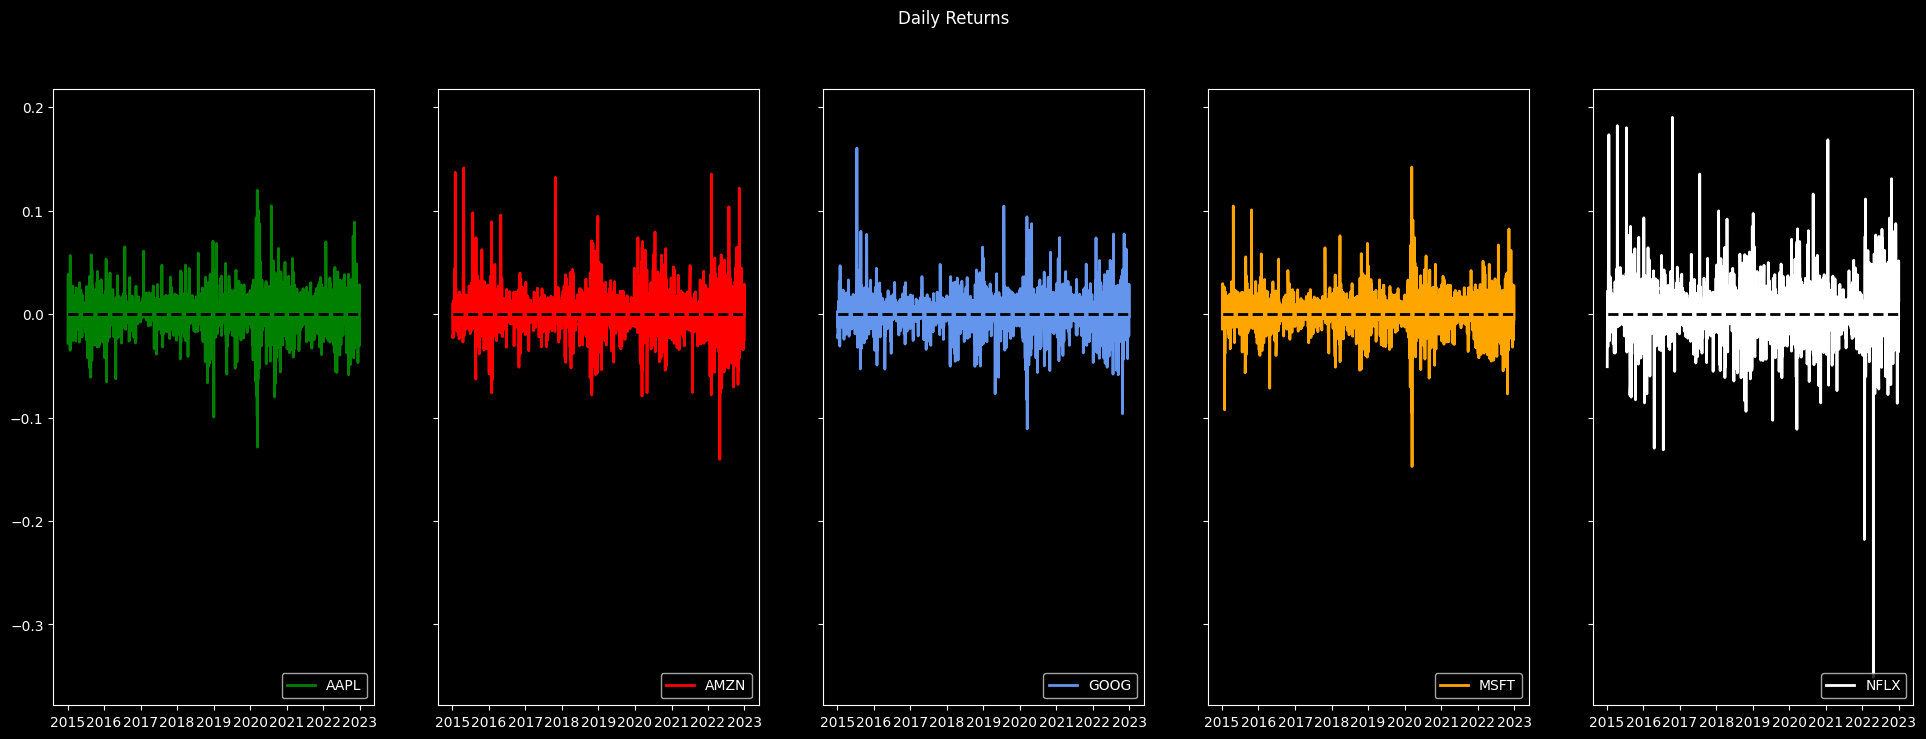

In [20]:
# Visualize daily returns
fig, ax = plt.subplots(1,len(df.columns), sharey=True)
label, color = df.columns, ['green', 'red', 'cornflowerblue', 'orange', 'white']

for i in range(len(df.columns)):
    ax[i].plot(returns.iloc[:,i], label=label[i], color=color[i])
    ax[i].axhline(y=0, color='k', linestyle='--')
    ax[i].legend(loc=4)

fig.suptitle('Daily Returns');

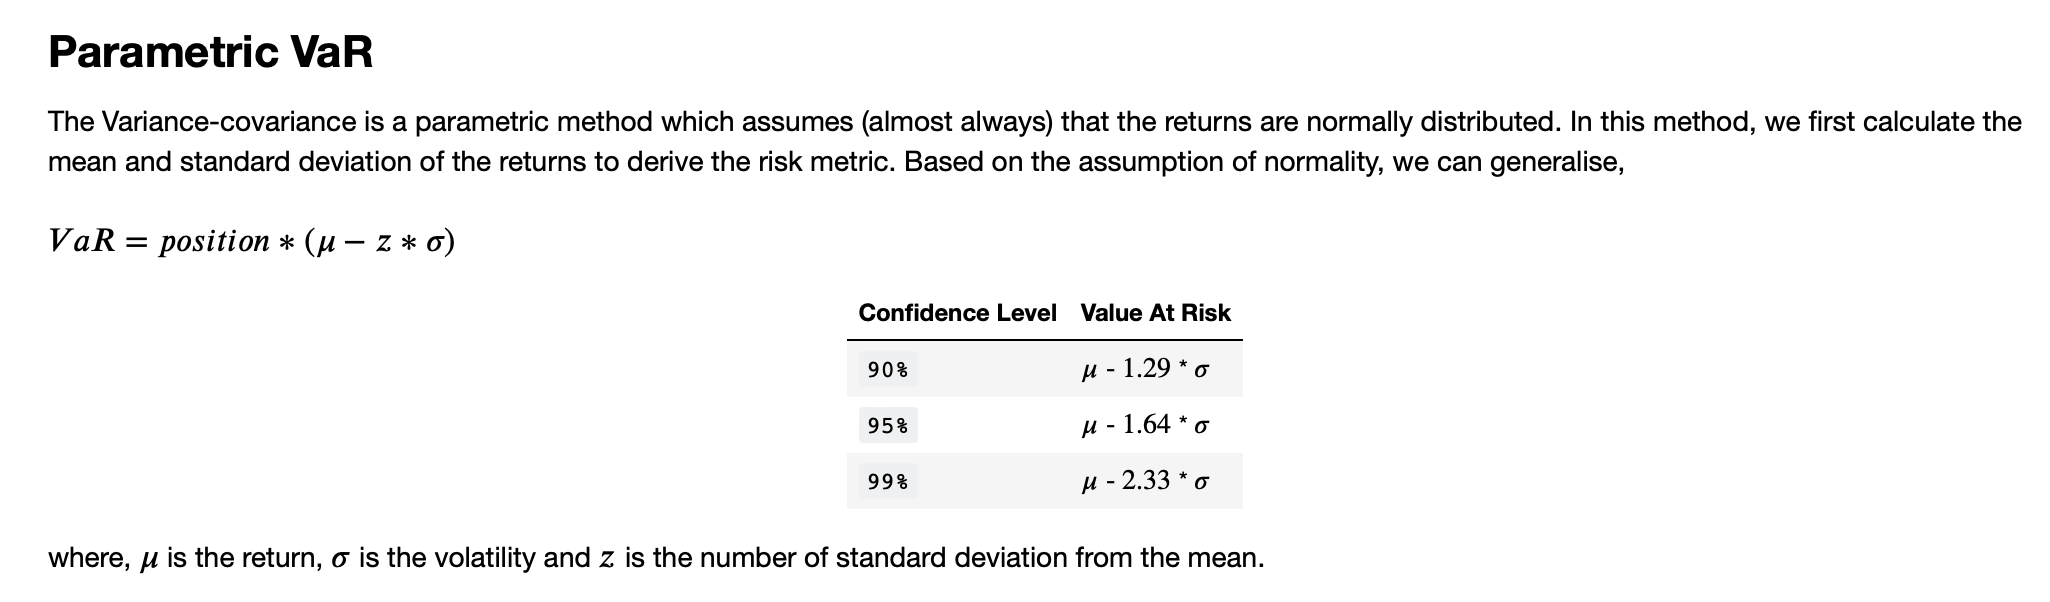

In [21]:
# Plot for Value-At-Risk
def plot_var():

    # Hard coded for 95% confidence limit
    
    # Specify confidence level
    confidence_level = 0.95

    # Standard deviation
    z = norm.ppf(1-confidence_level)

    # Specify x ranges for plotting
    x = np.arange(-6,6,0.1)
    x2 = np.arange(-6,z,1/40.)

    # Figure text for annotation
    note1 ='Red area to the left of the'
    note2 ='dotted red line reprsesents'
    note3 ='5% of the total area'
    note4 ='The curve represents a profit/loss'
    note5 ='density function. The 5% VaR is'
    note6 ='1.64 standard deviation from the mean'

    # Set figure size
    plt.figure(figsize=(8, 6))

    # Plot probability density function
    plt.plot(x, norm.pdf(x, 0, 1))

    plt.ylim(0,0.5)

    # Plot vertical line at confidence limit
    plt.axvline(x=z, ymin=0, ymax = 1, linewidth=2, ls='dotted', color='r')

    # Fill the left tail from confidence limit
    plt.fill_between(x2,norm.pdf(x2, 0, 1), color='red')

    # Annotate with notes
    plt.figtext(0.14,0.5,note1)
    plt.figtext(0.14,0.47,note2)
    plt.figtext(0.14,0.44,note3)

    plt.figtext(0.5,0.85,note4)
    plt.figtext(0.5,0.82,note5)
    plt.figtext(0.5,0.79,note6)

    # Annotate and plot title
    plt.annotate("", xy=(-2.5,0.08), xytext=(-2.5,0.18), arrowprops=dict(facecolor='red',shrink=0.001))
    plt.annotate('z = '+str(np.around(z,2)), xy=(-1.5,0.05))
    plt.title("VaR at 95% confidence level")

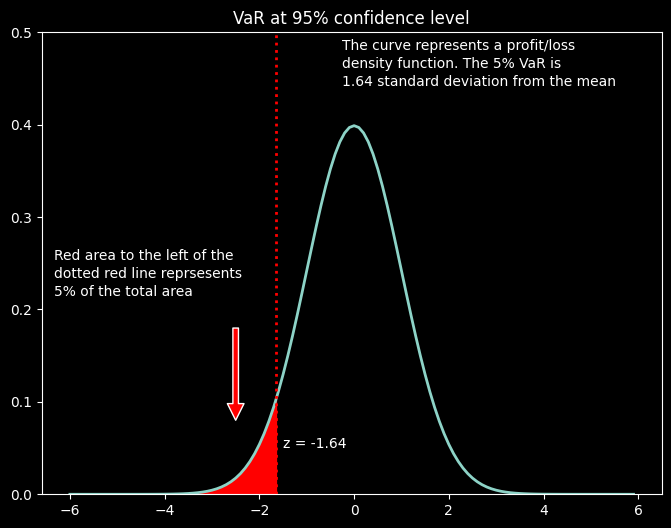

In [22]:
# Visualize VaR at 95% confidence level
plot_var()

In [24]:
# Calculate mean and standard deviation 
mean = np.mean(returns['AAPL'])
stdev = np.std(returns['AAPL'])

# Calculate VaR at difference confidence level
VaR_90 = norm.ppf(1-0.90,mean,stdev)
VaR_95 = norm.ppf(1-0.95,mean,stdev) 
VaR_99 = norm.ppf(1-0.99,mean,stdev)

In [25]:
# number of stdev from the mean
norm.ppf(0.05)

-1.6448536269514729

In [26]:
# Ouput results in tabular format
table = [['90%', VaR_90],['95%', VaR_95],['99%', VaR_99] ]
header = ['Confidence Level', 'Value At Risk']
print(tabulate(table,headers=header))

Confidence Level      Value At Risk
------------------  ---------------
90%                      -0.0231661
95%                      -0.0300183
99%                      -0.0428718


Lets now define a VaR function so that we can use it calculate it for individual stocks

UDF : User Defined Function

In [28]:
# VaR function
def VaR(dataframe):
    var = pd.DataFrame()

    for i in [90, 95, 99]:
        for j in range(len(df.columns)):
            var.loc[i, j] = 100 * norm.ppf(1-i/100, dataframe.iloc[:,j].mean(), dataframe.iloc[:,j].std())

    var.columns = df.columns
    return var

In [29]:
# VaR for stocks
VaR(returns)

,AAPL,AMZN,GOOG,MSFT,NFLX
90,-2.317212,-2.581943,-2.211230,-2.168883,-3.563259
95,-3.002599,-3.343963,-2.859783,-2.813136,-4.610422
99,-4.288272,-4.773385,-4.076359,-4.021645,-6.574726


Now, let's assume that we have 1,000 shares of AAPL's stock on Dec 30, 2021. What is the maximum loss next day with a confidence level of 99%?

In [31]:
num_of_shares = 1000
price = df['AAPL'].iloc[-1]
position = num_of_shares * price 

amd_var = position * VaR_99

print(f'AAPL Holding Value: {position}')
print(f'AAPL VaR at 99% confidence level is: {amd_var}')

AAPL Holding Value: 129731.91833496094
AAPL VaR at 99% confidence level is: -5561.843366824152


VaR can also be calculated using the above formula at 99% confidence level.

## Historical VaR
Asset returns do not necessarily follow a normal distribution. An alternative is to use sorted returns to evaluate a VaR. This method uses historical data where returns are sorted in ascending order to calculate maximum possible loss for a given confidence level.

In [32]:
# Use quantile function for Historical VaR
hVaR_90 = returns['AAPL'].quantile(0.10)
hVaR_95 = returns['AAPL'].quantile(0.05)
hVaR_99 = returns['AAPL'].quantile(0.01)

In [35]:
htable = [['90%', hVaR_90],['95%', hVaR_95],['99%', hVaR_99]]
print(tabulate(htable,headers=header))

Confidence Level      Value At Risk
------------------  ---------------
90%                      -0.020668
95%                      -0.0288852
99%                      -0.0516651


## MonteCarlo VaR
The Monte Carlo simulation approach has a number of similarities to historical simulation. It allows us to use actual historical distributions rather than having to assume normal returns. As returns are assumed to follow a normal distribution, we could generate n simulated returns with the same mean and standard deviation (derived from the daily returns) and then sorted in ascending order to calculate maximum possible loss for a given confidence level.

In [33]:
# Set seed for reproducibility
np.random.seed(42)

# Number of simulations
n_sims = 5000

# Simulate returns and sort
sim_returns = np.random.normal(mean, stdev, n_sims)

# Use percentile function for MCVaR
MCVaR_90 = np.percentile(sim_returns,10)
MCVaR_95 = np.percentile(sim_returns, 5)
MCVaR_99 = np.percentile(sim_returns,1)

In [34]:
mctable = [['90%', MCVaR_90],['95%', MCVaR_95],['99%', MCVaR_99]]
print(tabulate(mctable,headers=header))

Confidence Level      Value At Risk
------------------  ---------------
90%                      -0.0229369
95%                      -0.0294296
99%                      -0.0435635


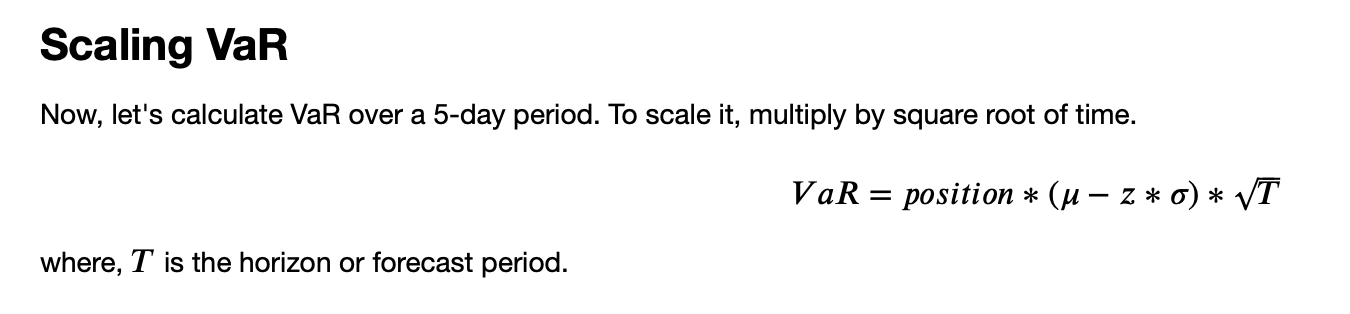

In [36]:
forecast_days = 5
f_VaR_90 = VaR_90*np.sqrt(forecast_days)
f_VaR_95 = VaR_95*np.sqrt(forecast_days)
f_VaR_99 = VaR_99*np.sqrt(forecast_days)

In [37]:
ftable = [['90%', f_VaR_90],['95%', f_VaR_95],['99%', f_VaR_99] ]
fheader = ['Confidence Level', '5-Day Forecast Value At Risk']
print(tabulate(ftable,headers=fheader))

Confidence Level      5-Day Forecast Value At Risk
------------------  ------------------------------
90%                                     -0.051801
95%                                     -0.0671229
99%                                     -0.0958643


Let's now calculate AAPL VaR over a 5-day period with a confidence level of 99%

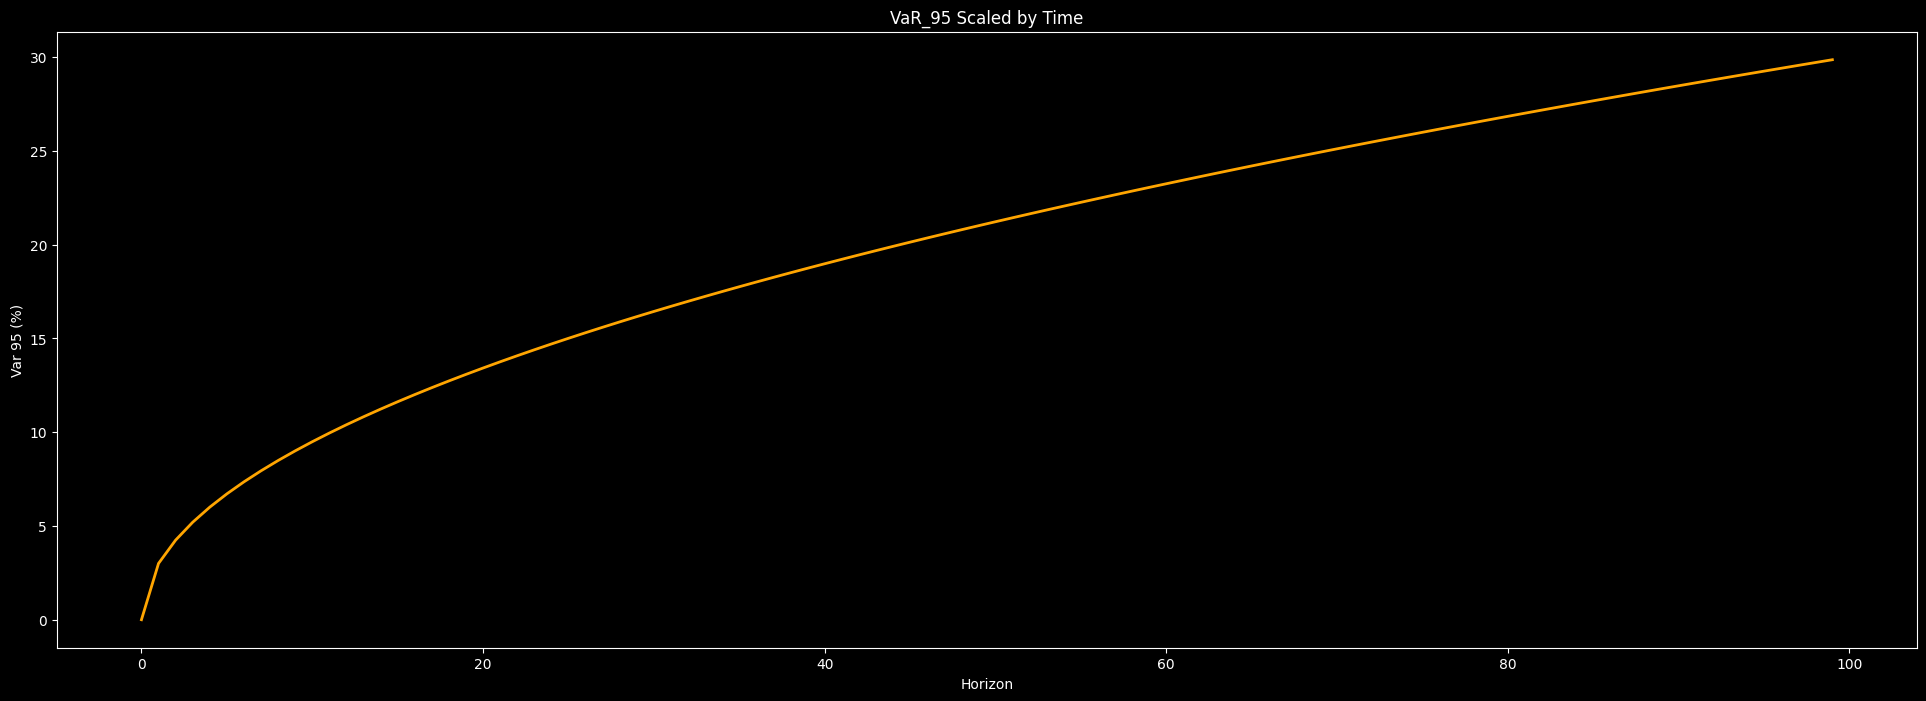

In [38]:
# Scaled VaR over different time horizon
# plt.figure()
plt.plot(range(100),[-100*VaR_95*np.sqrt(x) for x in range(100)], color='orange')
plt.xlabel('Horizon')
plt.ylabel('Var 95 (%)')
plt.title('VaR_95 Scaled by Time');

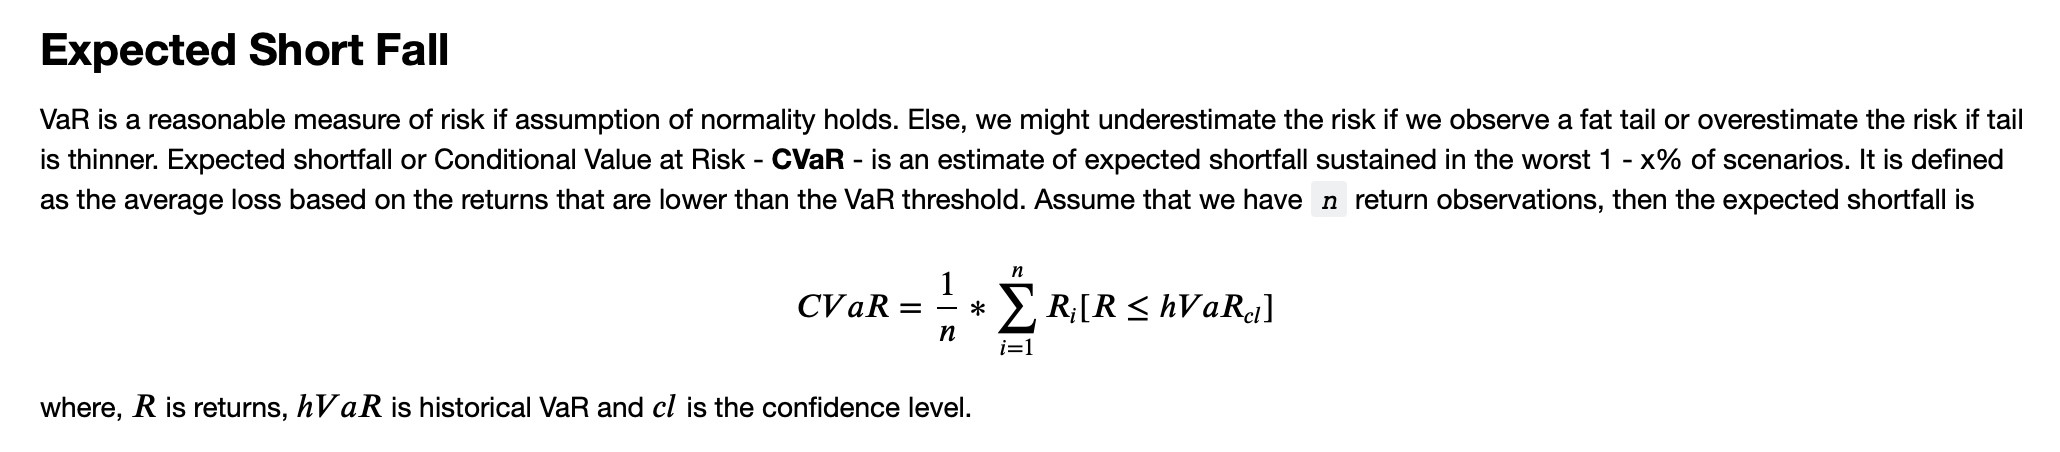

In [39]:
# Weights from Minimum Variance Portfolio
weights = pd.DataFrame([0., 57.71, 13.14, 29.16, 0.0]).T
weights.columns = df.columns
weights

,AAPL,AMZN,GOOG,MSFT,NFLX
0,0.0,57.71,13.14,29.16,0.0


In [40]:
# Portfolio returns
port_ret = np.dot(returns, weights.T)
port_mean = port_ret.mean()
port_mean

0.10152727704722272

In [41]:
# Portfolio volatility
port_stdev = np.sqrt(multi_dot([weights, returns.cov(), weights.T]))
port_stdev.flatten()[0]

1.7834483489569763

In [42]:
# Calculate Portfolio VaR at difference confidence level
pVaR_90 = norm.ppf(1-0.90,port_mean,port_stdev).flatten()[0]
pVaR_95 = norm.ppf(1-0.95,port_mean,port_stdev).flatten()[0]
pVaR_99 = norm.ppf(1-0.99,port_mean,port_stdev).flatten()[0]

In [43]:
# Ouput results in tabular format
ptable = [['90%', pVaR_90],['95%', pVaR_95],['99%', pVaR_99]]
header = ['Confidence Level', 'Value At Risk']
print(tabulate(ptable,headers=header))

Confidence Level      Value At Risk
------------------  ---------------
90%                        -2.18405
95%                        -2.83198
99%                        -4.04739


Let's now compare the portfolio VaR numbers with that of the individual stocks

In [44]:
# Iterate over symbols
portpos=0.
for stock in df.columns:
    pos = df[stock].iloc[-1] * 1000*weights[stock][0]
    pvar = VaR(returns)[stock].iloc[1]

    print(f'{stock} Holding Value: {pos:0.8}') 
    print(f'{stock} VaR at 95% confidence level: {pvar:0.8}%')
    print()

    portpos += pos

print(f'Portfolio Holding Value: {portpos:0.8}')
print(f'Portoflio VaR at 95% confidence level: {pVaR_95:0.3}%')

AAPL Holding Value: 0.0
AAPL VaR at 95% confidence level: -3.0025992%

AMZN Holding Value: 4847640.0
AMZN VaR at 95% confidence level: -3.3439629%

GOOG Holding Value: 1165912.2
GOOG VaR at 95% confidence level: -2.8597826%

MSFT Holding Value: 6975679.3
MSFT VaR at 95% confidence level: -2.8131356%

NFLX Holding Value: 0.0
NFLX VaR at 95% confidence level: -4.6104221%

Portfolio Holding Value: 1.2989232e+07
Portoflio VaR at 95% confidence level: -2.83%
